In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.discriminant_analysis as sda
import sklearn.model_selection as sms
from numpy import set_printoptions
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
filename = 'data/pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names = names)
data.head()
pd.set_option('display.precision',3)
print(data.head(10))
set_printoptions(precision = 3)

print(data.head(10))
set_printoptions(precision = 3)

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0  25.6  0.201   30      0
6     3    78    50    32    88  31.0  0.248   26      1
7    10   115     0     0     0  35.3  0.134   29      0
8     2   197    70    45   543  30.5  0.158   53      1
9     8   125    96     0     0   0.0  0.232   54      1
   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1
5     5   116    74     0     0

Постройте гистограмму для всех признаков, воспользовавшись функцией hist() и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.

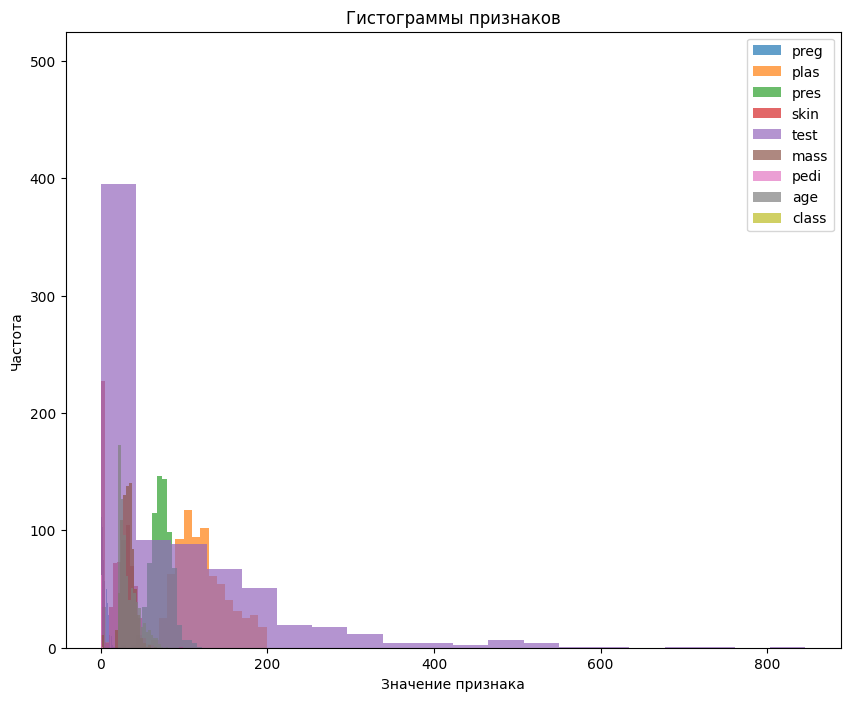

In [19]:
plt.figure(figsize=(10, 8))

for column in data.columns:
    plt.hist(data[column], bins=20, alpha=0.7, label=column)

plt.legend(loc='upper right')
plt.xlabel('Значение признака')
plt.ylabel('Частота')
plt.title('Гистограммы признаков')
plt.show()

9.	Постройте ящики с усами для всех признаков, воспользовавшись функцией plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False) и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат

<Figure size 2000x2000 with 0 Axes>

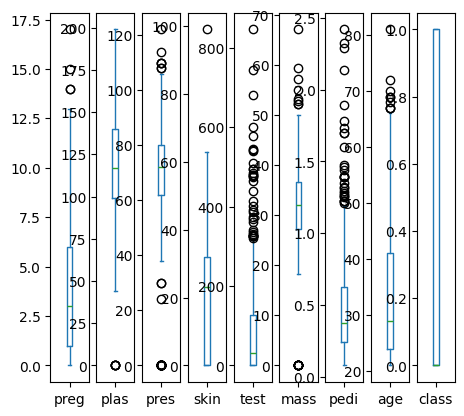

In [20]:
plt.figure(figsize=(20, 20))


data.plot(kind='box', subplots=True, layout=(1, 11), sharex=False, sharey=False)
plt.show()

Постройте диаграмму рассеяния, воспользовавшись функцией scatter_matrix() из модуля pandas.plotting и функцией show() из модуля matplotlib.pyplot. Прокомментируйте результат.

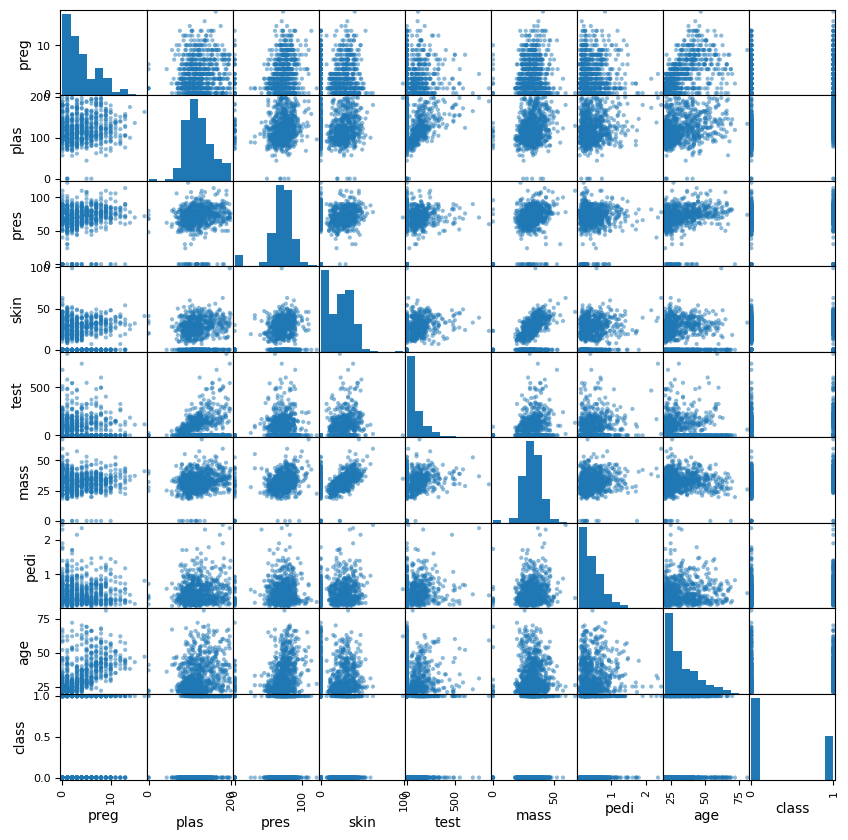

In [21]:
pd.plotting.scatter_matrix(data, figsize=(10, 10))
plt.show()

11.	Сохраните в переменную array значения признаков, обратившись к атрибуту values.

In [22]:
array = data.values

Выделите в переменной array часть, которая относится к факторным признакам, назовите ее X, и часть, которая относится к результативному признаку, - Y. Прокомментируйте содержимое переменных X и Y.

In [23]:
X = array[:, 1:]
Y = array[:, 0]

print("X:", X.shape)
print("Y:", Y.shape)

X: (768, 8)
Y: (768,)


В качестве Y результативного фактора был выбран диагноз (1 столбец), а Х оставшиеся признаки в качестве факторныхх признаков

Разбейте выборку на обучающий и тестовый набор с помощью функции train_test_split(X, Y, test_size= test_size, random_state= random_state) из модуля sklearn.model_selection. Пусть доля тестовой выборки (test_size) - 0,2. Счетчик случайных чисел (random_state) – пусть 7. Результат запишите в переменные X_train, X_test, Y_train, Y_test.

In [24]:
X_train, X_test, Y_train, Y_test = sms.train_test_split(X, Y, test_size=0.2, random_state= 7)

14.	 Создайте пустой список и запишите его в переменную models.
15.	 Добавьте в список models с помощью функции append() набор из кортежей, первый элемент которого содержит название модели, а второй – функцию для создания соответствующей модели. Включите все линейные и нелинейные модели для классификации, рассмотренные в заданиях 7 и 8. Можно при этом воспользоваться следующими сокращениями:
•	LR – логистическая регрессия;
•	SVM – линейный метод опорных векторов;
•	LDA – линейный дискриминантный анализ;
•	KNN - модель ближайшего соседа;
•	NB - наивный байесовский классификатор;
•	CART - модель решающего дерева.
16.	Выведите на экран список названий моделей с соответствующими значениями средней доли правильных ответов и стандартного отклонения, рассчитанными на кросс-валидации.


Обучите выбранную в п. 18 модель на обучающем наборе с помощью функции fit().

In [25]:
model_linear = sda.LinearDiscriminantAnalysis()
model_linear.fit(X, Y)

LinearDiscriminantAnalysis()

На основе факторных признаков тестового набора найдите расчетные значения по модели, воспользовавшись функцией predict(). Результат запишите в переменную predictions.

In [26]:
predictions = model_linear.predict(X_test)

На основе результативного признака из тестового набора (Y_test) и расчетных значений по модели (predictions) найдите долю правильных ответов (accuracy), воспользовавшись функцией accuracy_score() из модуля sklearn.metrics.

In [27]:
accuracy = accuracy_score(Y_test, predictions)

Постройте матрицу ошибок с помощью функции confusion_matrix() из модуля sklearn.metrics. На вход этой функции подайте фактические значения результативного признака на тестовом наборе (Y_test) и расчетные значения по модели (predictions). Выведите на экран полученный результат.

In [28]:
confusion_matrix(Y_test, predictions)

array([[ 6, 12,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 4, 17,  1,  0,  1,  2,  0,  1,  2,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  2,  0,  1,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0],
       [ 1, 10,  0,  4,  1,  1,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 3,  5,  0,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  0,  0,  0,  0,  0,  1,  4,  0,  0,  0,  1,  0,  0],
       [ 0,  5,  2,  0,  0,  0,  0,  0,  3,  1,  0,  0,  1,  0,  0],
       [ 0,  2,  0,  0,  1,  2,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  0,  1,  3,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 1,  1,  0,  1,  0,  0,  1,  3,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0


72 верно предсказанных отрицательных случая, 32 верно предсказанных положительных случая, 8 ложноотрицательных случаев и 2 ложноположительных случая.